# CLEANING AND PREPROCESSING OF CUSTOMERS' DATASET

In [1]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = r"C:\Users\shruti\Downloads\marketing_campaign.csv"
df = pd.read_csv(file_path, sep='\t')  

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
# Remove duplicate rows
df = df.drop_duplicates()

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Apply .strip() only to string (object) columns
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].map(lambda x: x.strip() if isinstance(x, str) else x)



In [3]:
# Check for and handle missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [4]:
#Fill missing values
df = df.fillna(0)

In [5]:
# Recheck after filling missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [6]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [7]:
#resets the index to start from 0 and drops the old index.
df = df.sort_values(by='ID').reset_index(drop=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,1985,Graduation,Married,70951.0,0,0,04-05-2013,66,239,...,1,0,0,0,0,0,0,3,11,0
1,1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,...,5,0,0,0,0,1,0,3,11,1
2,9,1975,Master,Single,46098.0,1,1,18-08-2012,86,57,...,8,0,0,0,0,0,0,3,11,0
3,13,1947,PhD,Widow,25358.0,0,1,22-07-2013,57,19,...,6,0,0,0,0,0,0,3,11,0
4,17,1971,PhD,Married,60491.0,0,1,06-09-2013,81,637,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,11178,1972,Master,Single,42394.0,1,0,23-03-2014,69,15,...,7,0,0,0,0,0,0,3,11,0
2236,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,0,0,0,0,3,11,0
2237,11187,1978,Basic,Single,26487.0,1,0,20-05-2013,23,2,...,5,0,0,0,0,0,0,3,11,0
2238,11188,1957,Graduation,Together,26091.0,1,1,25-02-2014,84,15,...,5,0,0,0,0,0,0,3,11,0


In [8]:
# Checking the data types for standardizing 
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [10]:
# Standardization of Education column
df['Education'] = df['Education'].replace('2n Cycle', 'Diploma')
df['Education'] = df['Education'].astype('string')
df['Education'].unique()

<StringArray>
['Graduation', 'Master', 'PhD', 'Diploma', 'Basic']
Length: 5, dtype: string

In [12]:
# Standardization of Marital_Status column by addition of new column Marital_Category

df['Marital_Category'] = df['Marital_Status'].replace({
    'Together': 'Married',
    'Single': 'Unmarried',
    'Divorced': 'Separated',
    'Widow': 'Separated',
    'Absurd':'Separated',
    'YOLO' :'Unmarried',
    'Alone':'Unmarried'
})

df['Marital_Status'] = df['Marital_Status'].astype('string')
df['Marital_Category'] = df['Marital_Category'].astype('string')
df['Marital_Status'].unique()
df['Marital_Category'].unique()

<StringArray>
['Married', 'Unmarried', 'Separated']
Length: 3, dtype: string

In [13]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital_Category
0,0,1985,Graduation,Married,70951.0,0,0,04-05-2013,66,239,...,0,0,0,0,0,0,3,11,0,Married
1,1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,...,0,0,0,0,1,0,3,11,1,Unmarried
2,9,1975,Master,Single,46098.0,1,1,18-08-2012,86,57,...,0,0,0,0,0,0,3,11,0,Unmarried
3,13,1947,PhD,Widow,25358.0,0,1,22-07-2013,57,19,...,0,0,0,0,0,0,3,11,0,Separated
4,17,1971,PhD,Married,60491.0,0,1,06-09-2013,81,637,...,0,0,0,0,0,0,3,11,0,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,11178,1972,Master,Single,42394.0,1,0,23-03-2014,69,15,...,0,0,0,0,0,0,3,11,0,Unmarried
2236,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,0,0,0,3,11,0,Married
2237,11187,1978,Basic,Single,26487.0,1,0,20-05-2013,23,2,...,0,0,0,0,0,0,3,11,0,Unmarried
2238,11188,1957,Graduation,Together,26091.0,1,1,25-02-2014,84,15,...,0,0,0,0,0,0,3,11,0,Married


In [14]:
df['Income'] = df['Income'].replace('', regex=True).astype(float)

In [15]:
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].map(lambda x: x.strip() if isinstance(x, str) else x)

# Convert date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [16]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital_Category
0,0,1985,Graduation,Married,70951.0,0,0,2013-05-04,66,239,...,0,0,0,0,0,0,3,11,0,Married
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,0,3,11,1,Unmarried
2,9,1975,Master,Single,46098.0,1,1,2012-08-18,86,57,...,0,0,0,0,0,0,3,11,0,Unmarried
3,13,1947,PhD,Widow,25358.0,0,1,2013-07-22,57,19,...,0,0,0,0,0,0,3,11,0,Separated
4,17,1971,PhD,Married,60491.0,0,1,2013-09-06,81,637,...,0,0,0,0,0,0,3,11,0,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,11178,1972,Master,Single,42394.0,1,0,2014-03-23,69,15,...,0,0,0,0,0,0,3,11,0,Unmarried
2236,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,3,11,0,Married
2237,11187,1978,Basic,Single,26487.0,1,0,2013-05-20,23,2,...,0,0,0,0,0,0,3,11,0,Unmarried
2238,11188,1957,Graduation,Together,26091.0,1,1,2014-02-25,84,15,...,0,0,0,0,0,0,3,11,0,Married


# Checking Data Quality

In [20]:
# Standardized data types
df.dtypes

ID                              int64
Year_Birth                      int64
Education              string[python]
Marital_Status         string[python]
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [21]:
print(df.isnull().sum()) 

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Marital_Category       0
dtype: int64


In [22]:
# Check for duplicates
print(df.duplicated().sum())

0


In [23]:
# Check Summary Statistics
print(df.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   51687.459375     0.444196     0.506250   
min        0.000000  1893.000000       0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   34722.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51075.000000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25609.342730     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.

In [24]:
# Counts for spelling check
print(df['Marital_Status'].value_counts())

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: Int64


In [25]:
print(df['Education'].value_counts())

Education
Graduation    1127
PhD            486
Master         370
Diploma        203
Basic           54
Name: count, dtype: Int64


<Axes: xlabel='Income'>

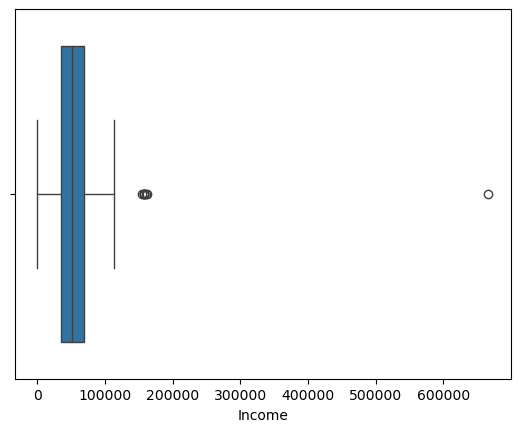

In [26]:
# Shows possible outliers
import seaborn as sns
sns.boxplot(x=df['Income']) 

Here few outliers suggest company has rich customers.

In [31]:
cols = list(df.columns)

# Remove 'Marital_Category' and insert it after 'Marital_Status'
cols.remove('Marital_Category')
index = cols.index('Marital_Status')
cols.insert(index + 1, 'Marital_Category')

# Reorder the DataFrame
df = df[cols]

In [32]:
#Cleans up inconsistent formatting
#Check for whitespace or case issue
df['Marital_Status'] = df['Marital_Status'].str.strip().str.title()
df['Marital_Category'] = df['Marital_Category'].str.strip().str.title()
df['Education'] = df['Education'].str.strip().str.title()

In [36]:
df = df.drop('Marital_Status', axis=1)

In [43]:
# Save cleaned file 
df.to_csv("Customers_Data.csv",sep=',', index=False)

In [44]:
# Visualize cleaned dataset
df.head()

,ID,Year_Birth,Education,Marital_Category,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,1985,Graduation,Married,70951.0,0,0,2013-05-04,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,3,11,0
1,1,1961,Graduation,Unmarried,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,0,3,11,1
2,9,1975,Master,Unmarried,46098.0,1,1,2012-08-18,86,57,0,27,0,0,36,4,3,2,2,8,0,0,0,0,0,0,3,11,0
3,13,1947,Phd,Separated,25358.0,0,1,2013-07-22,57,19,0,5,0,0,8,2,1,0,3,6,0,0,0,0,0,0,3,11,0
4,17,1971,Phd,Married,60491.0,0,1,2013-09-06,81,637,47,237,12,19,76,4,6,11,7,5,0,0,0,0,0,0,3,11,0
